# Wordle Solver

## Prepare Data

In [1]:
# with open('words.txt','r') as f:
#     dictionary = {t.strip().upper() for t in f.readlines() if len(t.strip()) == 5}
# # dictionary

# with open('wordle.txt','w') as f:
#     [f.writelines(x+",") for x in dictionary]

# Wordle AI

In [2]:
import player
from tqdm import tqdm
import game
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

game_record = []
N_games = 100

### Serialised

In [3]:
for game_count in tqdm(range(N_games)):
    bot = player.Player(verbose= False)
    wordle = game.Wordle(verbose= False)
    response = []
    while type(bot.board_response) != int:
        bot.board_response = wordle.play(bot.guess())
    if(bot.board_response == -1):
        game_record.append(7)
    else:
        game_record.append(wordle.guess_number + 1)
    # wordle.render()

100%|██████████| 100/100 [00:34<00:00,  2.87it/s]


### Parallelised

In [10]:
import os
import multiprocess

print(os.cpu_count())

pool = multiprocess.Pool(os.cpu_count()//2)

8


In [11]:
def simulate(n)->int:
    game_rec = []
    for i in range(n):
        bot = player.Player(verbose= False)
        wordle = game.Wordle(verbose= False)
        while type(bot.board_response) != int:
            bot.board_response = wordle.play(bot.guess())
        if(bot.board_response == -1):
            game_rec.append(7)
        else:
            game_rec.append(wordle.guess_number + 1)
    return game_rec

In [12]:
for guess_num in tqdm(pool.imap_unordered(simulate, range(N_games))):
    game_record.extend(guess_num)
pool.terminate()

40it [03:06,  4.67s/it]


Process ForkPoolWorker-5:
Process ForkPoolWorker-7:
Process ForkPoolWorker-6:
Process ForkPoolWorker-8:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/rchaks/opt/anaconda3/envs/sta380/lib/python3.9/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Users/rchaks/opt/anaconda3/envs/sta380/lib/python3.9/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/rchaks/opt/anaconda3/envs/sta380/lib/python3.9/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/rchaks/opt/anaconda3/envs/sta380/lib/python3.9/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/rchaks/opt/anaconda3/envs/sta380/lib/python3.9/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rchaks/opt/a

Process ForkPoolWorker-12:
Traceback (most recent call last):
  File "/Users/rchaks/opt/anaconda3/envs/sta380/lib/python3.9/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/rchaks/opt/anaconda3/envs/sta380/lib/python3.9/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rchaks/opt/anaconda3/envs/sta380/lib/python3.9/site-packages/multiprocess/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "<ipython-input-11-5150767a72bb>", line 7, in simulate
  File "/Users/rchaks/Code/GitHub/wordle-solver/player.py", line 49, in board_response
    self.vocab = self.vocab[self.vocab.apply(lambda x: (self.guessed_word[index] not in ''.join(x)), axis= 1)]
  File "/Users/rchaks/opt/anaconda3/envs/sta380/lib/python3.9/site-packages/pandas/core/frame.py", line 8827, in apply
    return op.apply().__finalize__(self, method="apply")
Process ForkPoolWorker-10:
  File "/

KeyboardInterrupt: 

# Results

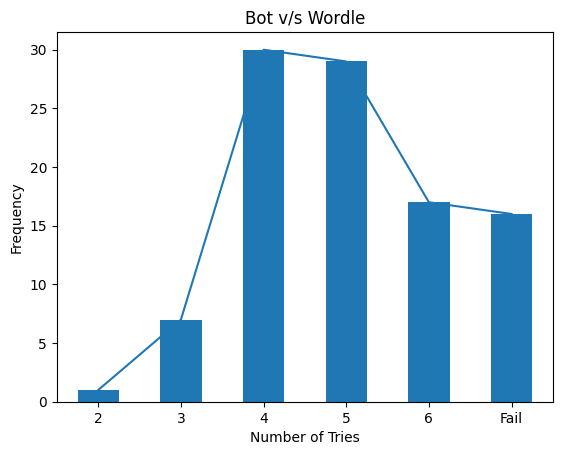

In [9]:
history = pd.Series(game_record).apply(lambda x: ('Fail' if x == 7 else x)).astype('str')
history = history.value_counts().sort_index()
pd.Series(history).plot(kind = "bar")
histoy = history/history.sum()
history.plot(kind = 'line')
plt.xlabel("Number of Tries")
plt.ylabel('Frequency')
plt.title('Bot v/s Wordle')
plt.show()

***